Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x02?\x08\x06\x00\x00\x00\x8f\x87\xbd\x9…

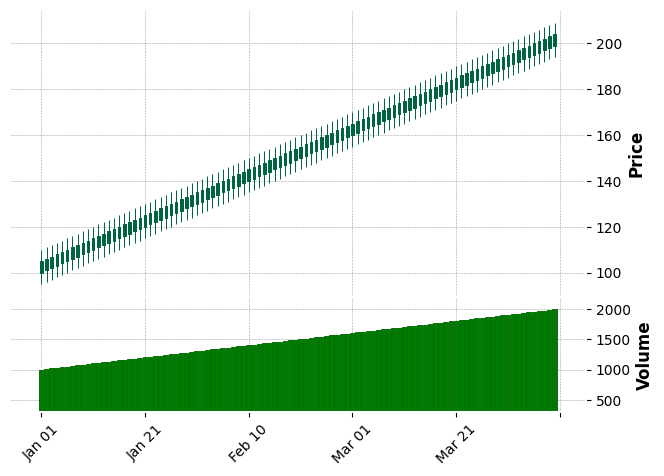

In [6]:
import pandas as pd
import mplfinance as mpf
import ipywidgets as widgets
from IPython.display import display, Image
import io
# Example DataFrame
data = pd.DataFrame({
    'Date': pd.date_range('2024-01-01', periods=100),
    'Open': [100 + i for i in range(100)],
    'High': [110 + i for i in range(100)],
    'Low': [95 + i for i in range(100)],
    'Close': [105 + i for i in range(100)],
    'Volume': [1000 + i * 10 for i in range(100)]
})
data.set_index('Date', inplace=True)
# Create a function to display mplfinance chart
def mplfinance_to_image(df):
    fig, ax = mpf.plot(df, type='candle', style='charles', volume=True, returnfig=True)
    
    # Save the figure to a byte buffer
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    #plt.close(fig)
    
    # Return the image data
    return buf.getvalue()

# Create an Image widget
image_widget = widgets.Image(format='png')

# Update the image widget with mplfinance chart
image_widget.value = mplfinance_to_image(data)

# Display the image widget
display(image_widget)